In [1]:
Pkg.add("LowRankModels")
Pkg.add("DataFrames")
Pkg.checkout("LowRankModels")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of LowRankModels
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of DataFrames
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Checking out LowRankModels master...
INFO: Pulling LowRankModels latest master...
INFO: No packages to install, update or remove


In [2]:
using LowRankModels
using DataFrames
using PyPlot

In [3]:
Mnist = Array(Bool, 15000, 784);

In [4]:
#Use 1st 7500 images of Mnist Train set
df = readtable("mnist_train_1_7500.csv", header = false);
Mnist1 = Array(Float64,nrow(df),ncol(df)-1)

for row = 1:nrow(df)
    for col = 2:ncol(df)
        Mnist1[row,col-1] = df[row,col]
    end
end

Mnist1 = round(Mnist1/255)
Mnist1 = convert(Array{Bool}, Mnist1);

In [5]:
#Use 2nd 7500 images of Mnist Train set
df = readtable("mnist_train_2_7500.csv", header = false);
Mnist2 = Array(Float64,nrow(df),ncol(df)-1)

for row = 1:nrow(df)
    for col = 2:ncol(df)
        Mnist2[row,col-1] = df[row,col]
    end
end

Mnist2 = round(Mnist2/255)
Mnist2 = convert(Array{Bool}, Mnist2);

In [6]:
Mnist[1:7500,:] = Mnist1;
Mnist[7501:15000,:] = Mnist2;

In [7]:
#InPainting Put top half in obs for all rows. Then bottom half for first 90%
nobs = 15000
npixels = 784
PropObserved = .9
obs = Array{Tuple{Int64,Int64}}(round(Int,((nobs*npixels)/2) + PropObserved*((nobs*npixels)/2)))
ind = 1

#Mark bottom half as observed for 90%
for row = 1:round(PropObserved*nobs)
    for col = round(Int,(npixels/2)+1):round(Int,npixels)
        obs[ind] = (row,col) 
        ind = ind+1
    end
end

#Mark top half as observed for all observations
for row = 1:nobs
    for col = 1:round(Int,npixels/2)
        obs[ind] = (row,col) 
        ind = ind+1
    end
end

In [40]:
m,n,k = 15000,784,50
losses = HingeLoss() # minimize squared distance to cluster centroids
params = ProxGradParams(max_iter = 1000)
rx = ZeroReg() # each row is assigned to exactly one cluster
ry = ZeroReg() # no regularization on the cluster centroids
glrm_IP_50 = GLRM(Mnist,losses,rx,ry,k, obs = obs);

In [ ]:
X_IP_50,Y_IP_50,ch_IP_50 = fit!(glrm_IP_50);

In [11]:
Yimp = impute(glrm_IP_50.losses,glrm_IP_50.X'*glrm_IP_50.Y)

15000×784 Array{Number,2}:
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
     ⋮                  

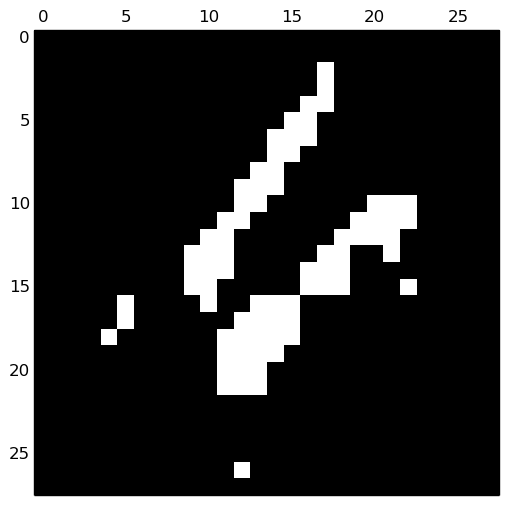

In [30]:
matshow(reshape(Yimp[14001,:],28,28)', cmap=ColorMap("gray"));

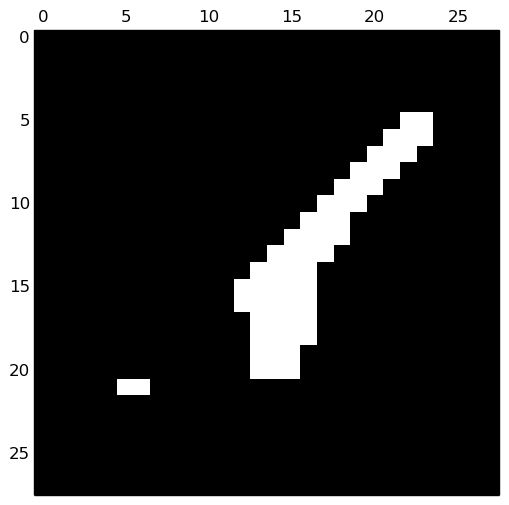

In [32]:
matshow(reshape(Yimp[14002,:],28,28)', cmap=ColorMap("gray"));

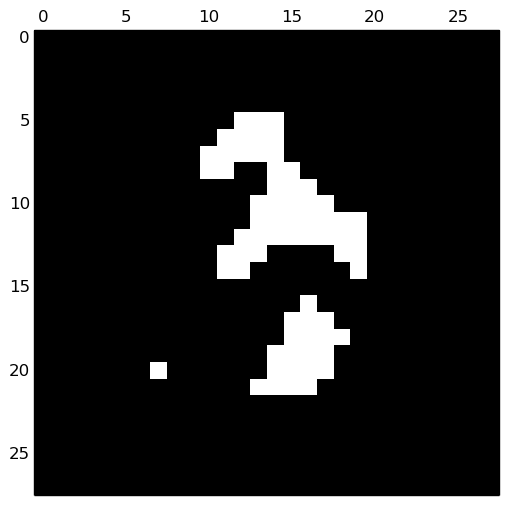

In [33]:
matshow(reshape(Yimp[14003,:],28,28)', cmap=ColorMap("gray"));

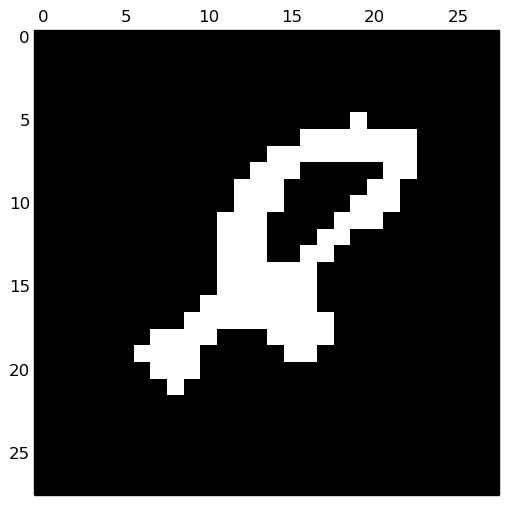

In [34]:
matshow(reshape(Yimp[14004,:],28,28)', cmap=ColorMap("gray"));

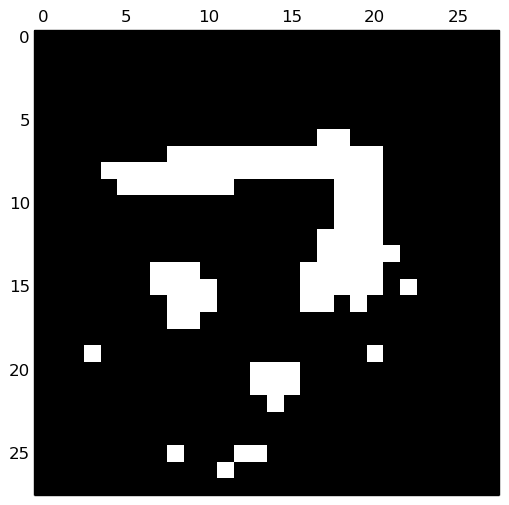

In [35]:
matshow(reshape(Yimp[14005,:],28,28)', cmap=ColorMap("gray"));

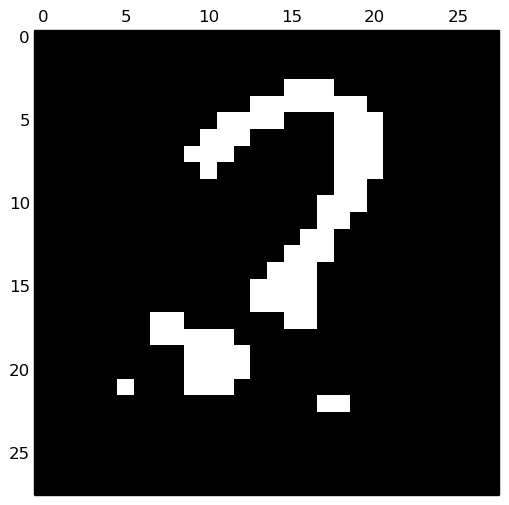

In [36]:
matshow(reshape(Yimp[14006,:],28,28)', cmap=ColorMap("gray"));

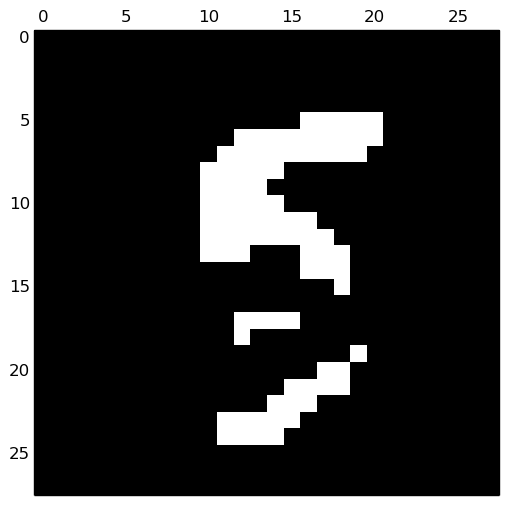

In [37]:
matshow(reshape(Yimp[14007,:],28,28)', cmap=ColorMap("gray"));

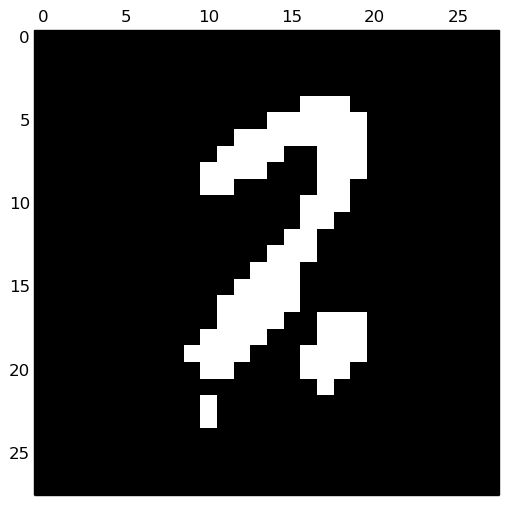

In [38]:
matshow(reshape(Yimp[14008,:],28,28)', cmap=ColorMap("gray"));

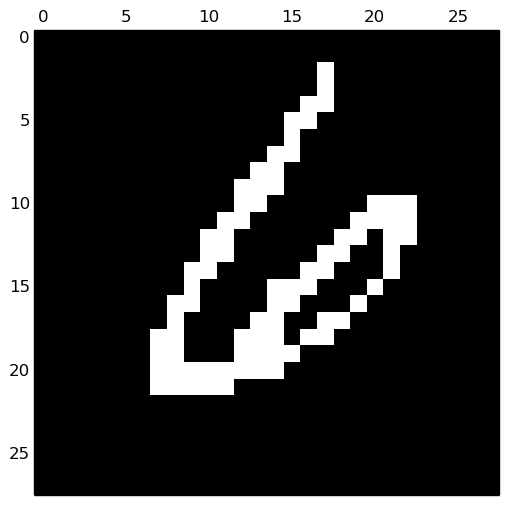

In [31]:
matshow(reshape(Mnist[14001,:],28,28)', cmap=ColorMap("gray"));